# A Walkthrough of *Exact Stochastic Simulation of Coupled Chemical Reactions* By Danlel T. Gillespie

## Part 5 - Brusselator

### Learning Goals of Part 5

In [1]:
from numpyGillespie import CompleteGillespie as cg
from numpyGillespie import pandas_output
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

### Lotka Reaction Equations

$$
\bar{X_1} \xrightarrow{c_1} Y_1
$$

$$
\bar{X_2} + Y_1 \xrightarrow{c_2} Y_2 + Z_1
$$

$$
2 Y_1 + Y_2 \xrightarrow{c_2} 3 Y_1
$$

$$
Y_1 \xrightarrow{c_4} Z_2
$$

In [10]:
# Define a list of Y_# values that will be tracked.
# These numbers are their starting values.
#           Y_1,  Y_2
species = [1000, 2000]

#          c1,     c2,      c3,  c4
rates = [5000.0, 50.0, 0.00005, 5.0]

# Define the changes.
#                                 Y_1,      Y_2
species_change = [lambda j: [j[0] + 1, j[1]],
                  lambda j: [j[0] - 1, j[1] + 1],
                  lambda j: [j[0] + 1, j[1]],
                  lambda j: [j[0] - 1, j[1]]]

# Define the functions that return the number of available combinations
# for a given reaction. The input for these lambda functions are the
# species list defined above.
avail_rxn = [lambda k: 1,
             lambda k: k[0],
             lambda k: k[0] * k[1] * (k[0] - 1) / 2,
             lambda k: k[0]]

In [24]:
out = cg(species, rates, species_change, avail_rxn, 10000000).simulate()

In [25]:
data = pandas_output(out)
list(data)

['time', 'mu', 'species_0', 'species_1', 'av_0', 'av_1', 'av_2', 'av_3']

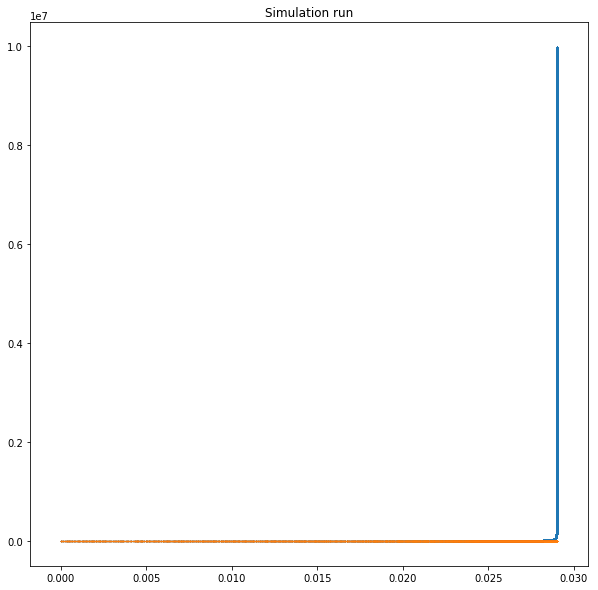

In [26]:
plt.figure(1, figsize=(10,10))
plt.scatter(data['time'], data['species_0'], marker=".", s=.5, alpha=0.9)
plt.scatter(data['time'], data['species_1'], marker=".", s=.5, alpha=0.9)

plt.title("Simulation run")
plt.show()